In [20]:
required_packages <- c( 
  # Add to this list the packages that you will use - if unavailable, it will be 
  # automatically installed
  "readr",
  "data.table",
  "dplyr",
  "ggplot2",
  "mlr",
  "knitr",
  "Hmisc"
    )

  packages_to_install = required_packages[!(required_packages %in% 
                                                installed.packages()[, 1])]
    
  if (length(packages_to_install) > 0) {
    install.packages(packages_to_install)
  }
    
  suppressPackageStartupMessages({
    sapply(required_packages, require, character.only = TRUE)
  })

readr data.table      dplyr    ggplot2        mlr      knitr      Hmisc 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE

# Import the data

In [3]:
df <- fread("creditcard.csv") #Use fread() from the data.table package to read in large datasets

Read 284807 rows and 31 (of 31) columns from 0.140 GB file in 00:00:10


In [19]:
head(df)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [21]:
describe(df)

df 

 31  Variables      284807  Observations
--------------------------------------------------------------------------------
Time 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
 284807       0  124592       1   94814   25298   35027   54202   84692  139321 
    .90     .95 
 157640  164143 

lowest :      0      1      2      4      7
highest: 172785 172786 172787 172788 172792 
--------------------------------------------------------------------------------
V1 
        n   missing    unique      Info      Mean       .05       .10       .25 
   284807         0    275663         1 1.176e-15  -2.89915  -1.89327  -0.92037 
      .50       .75       .90       .95 
  0.01811   1.31564   2.01541   2.08122 

lowest : -56.408 -46.855 -41.929 -40.470 -40.043
highest:   2.431   2.439   2.447   2.452   2.455 
--------------------------------------------------------------------------------
V2 
        n   missing    unique      Info      Mean       .05       .

We see tha there are no missing values in any of the columns in our dataset. Let us plot the distribution of these variables to see how they are distributed:

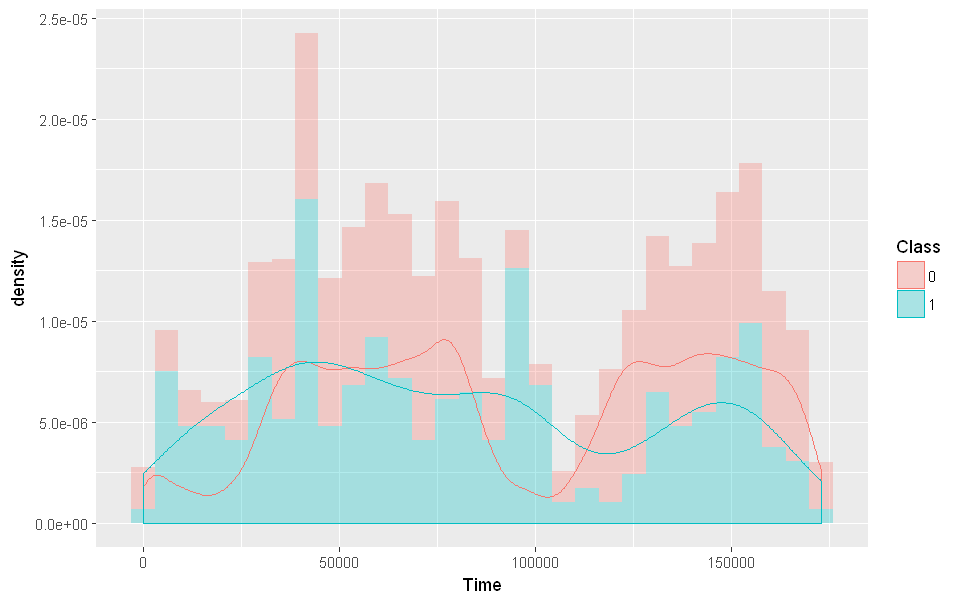

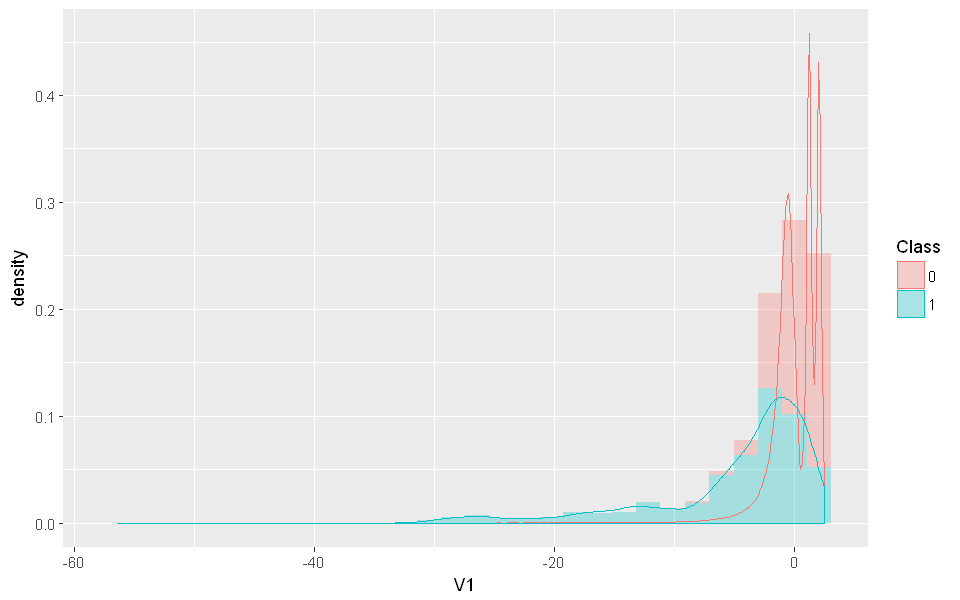

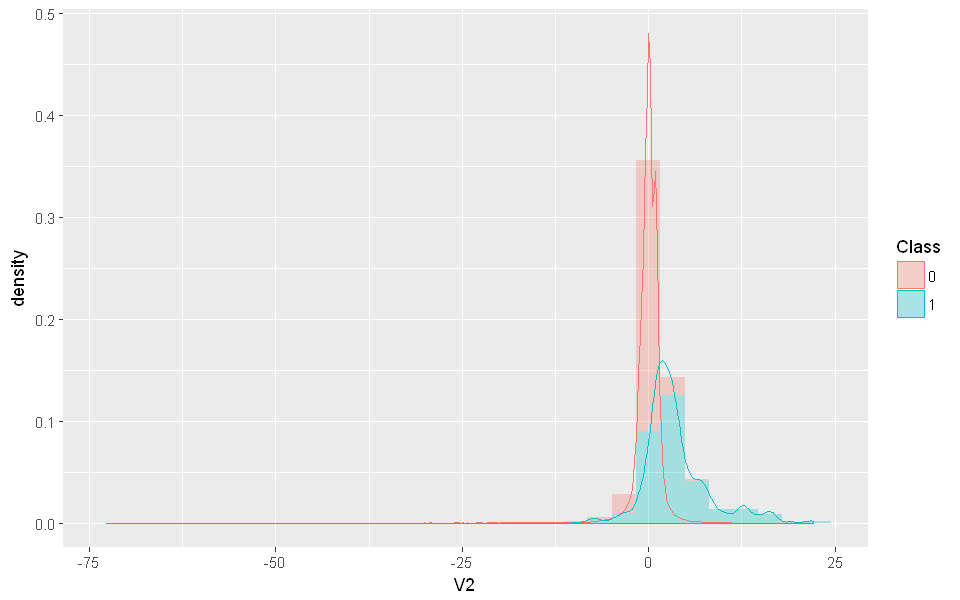

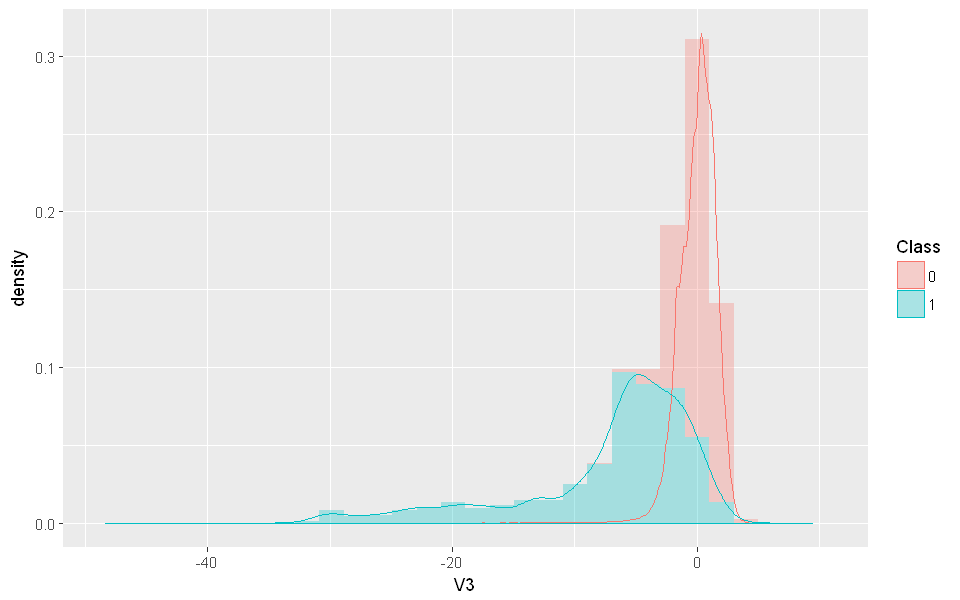

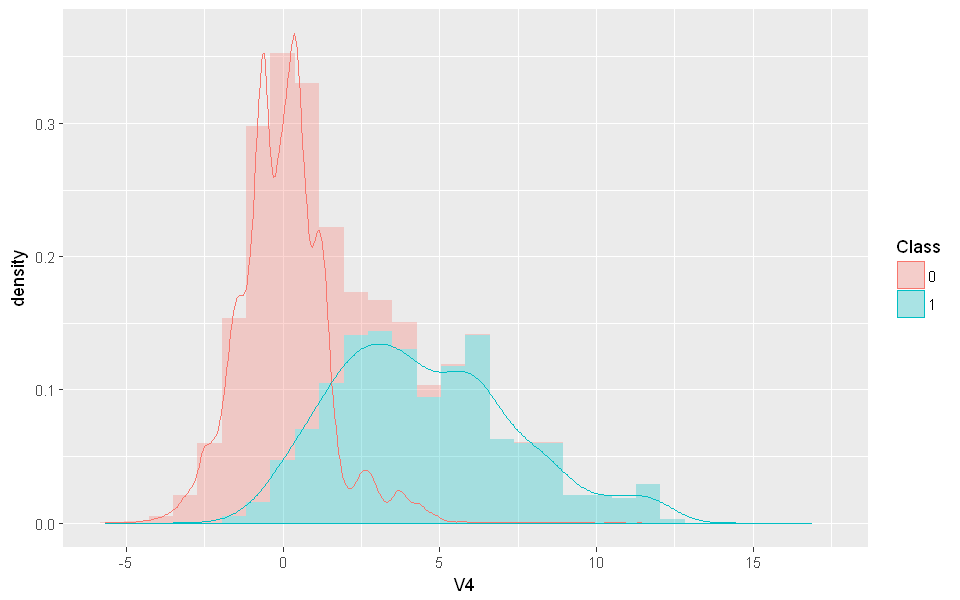

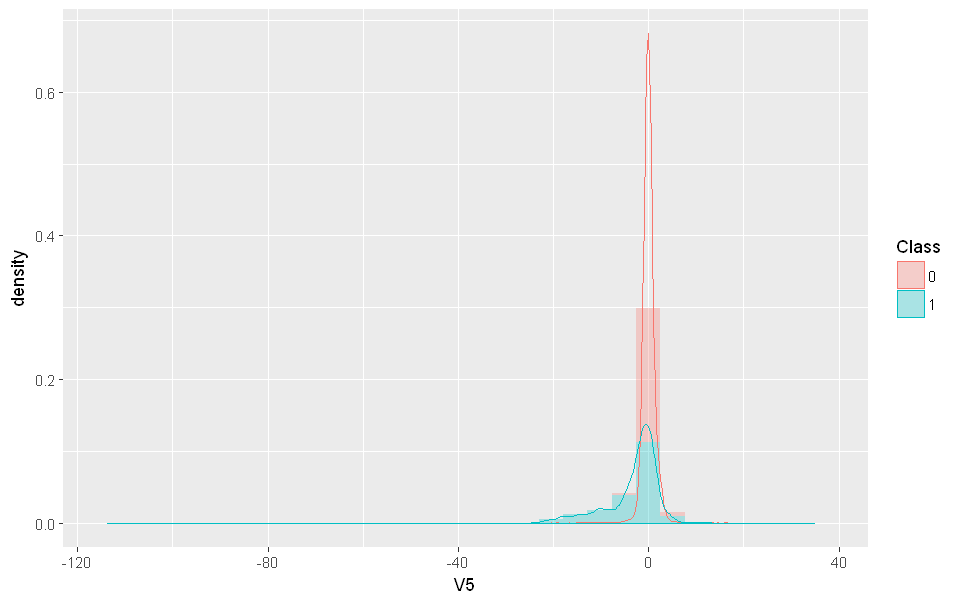

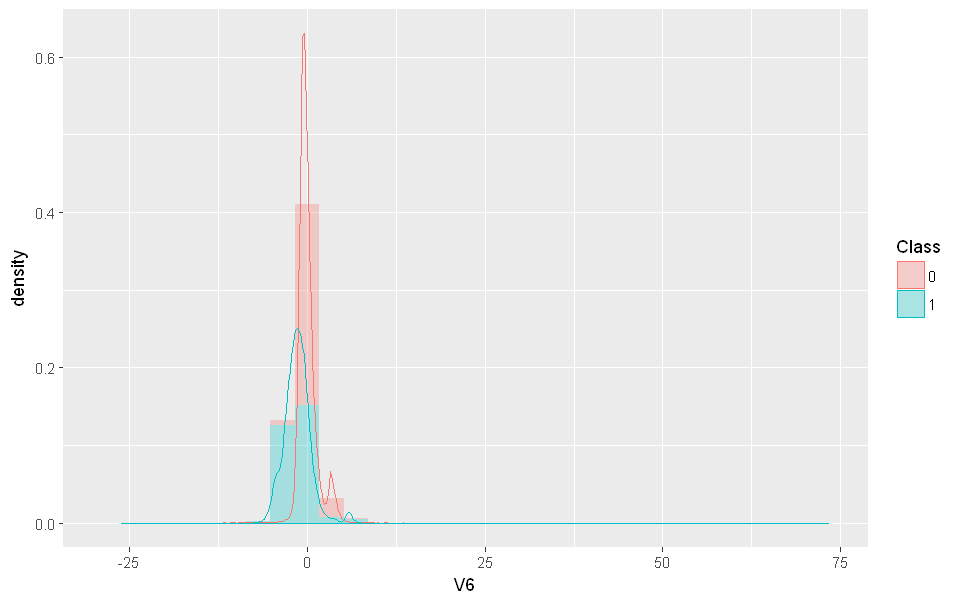

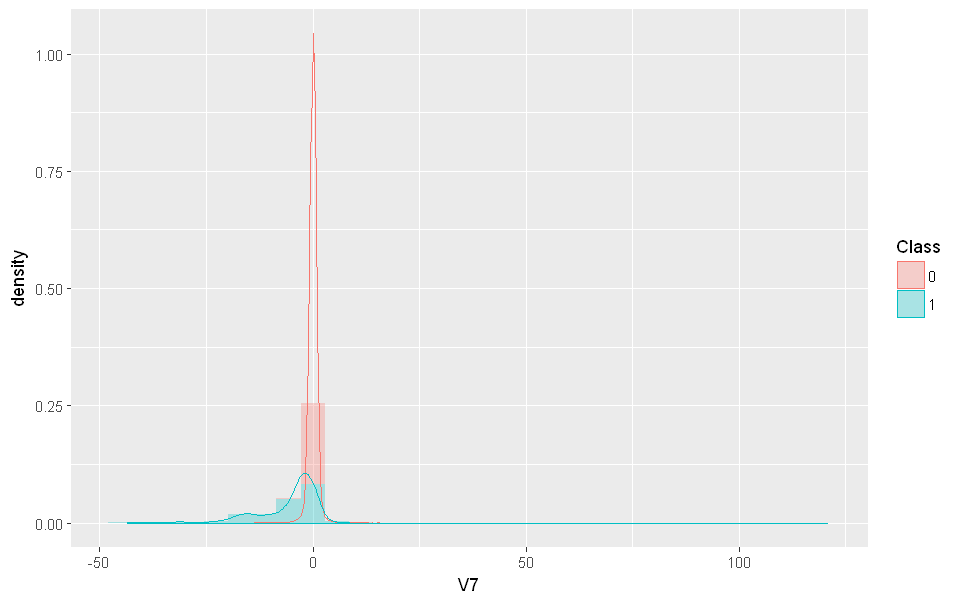

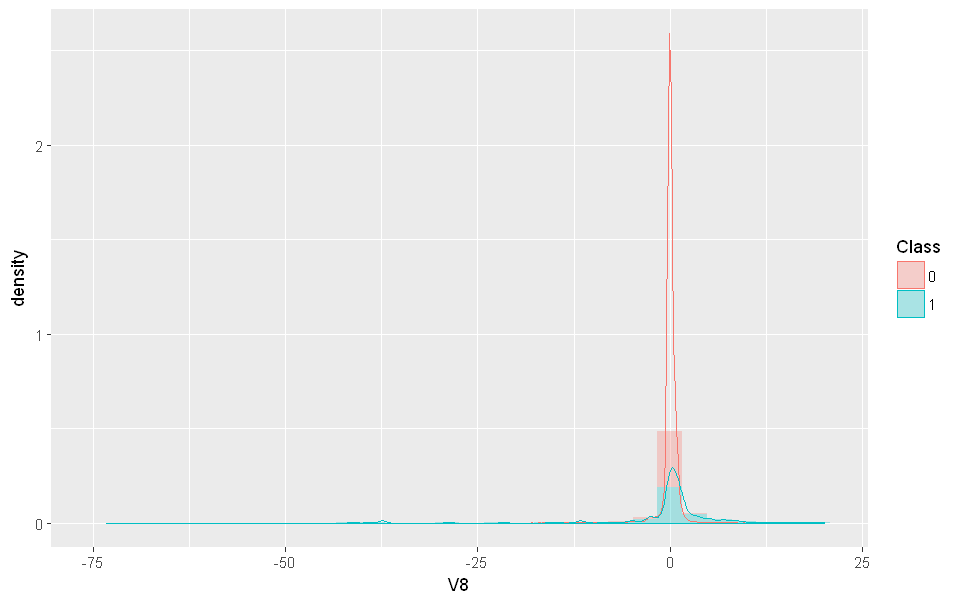

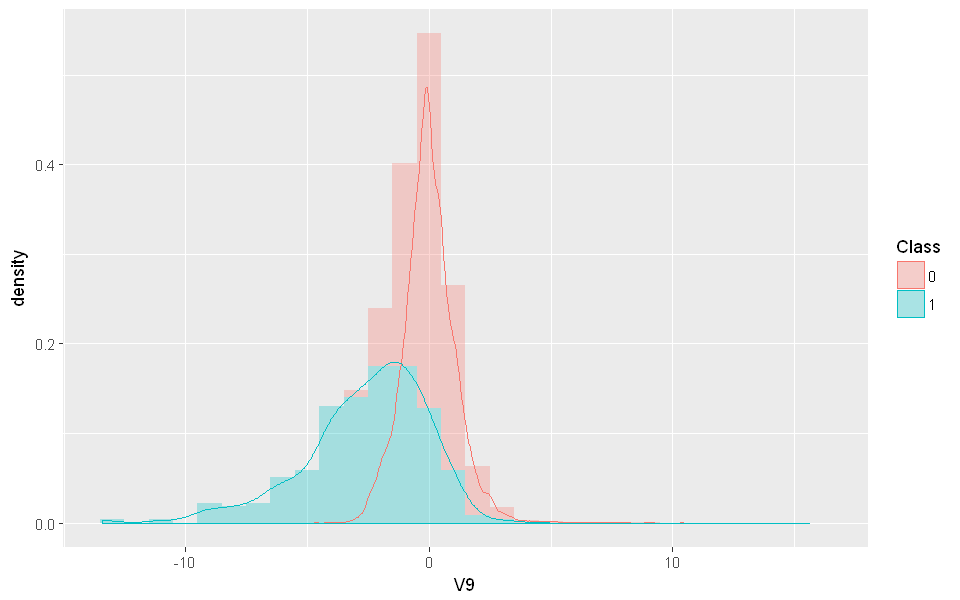

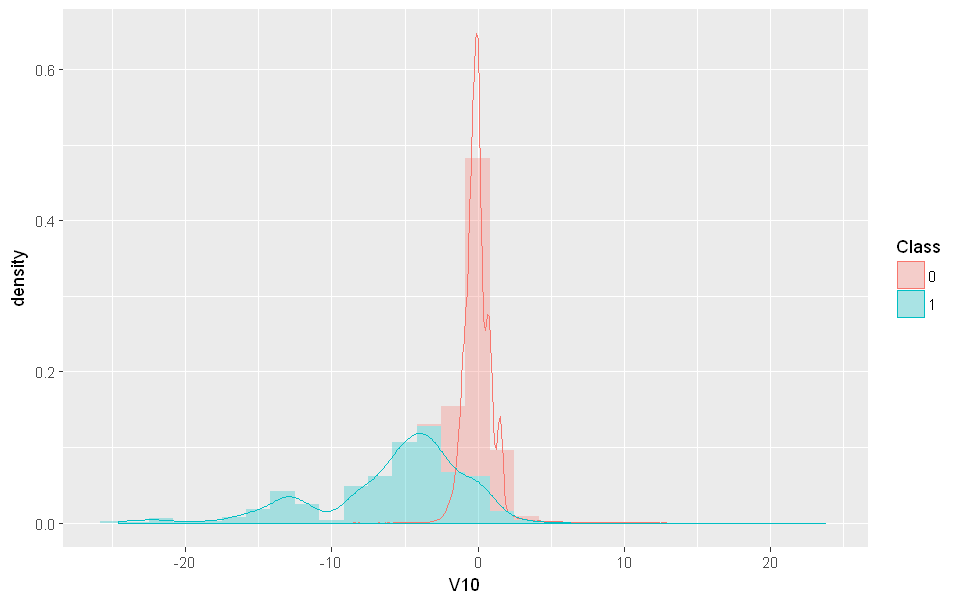

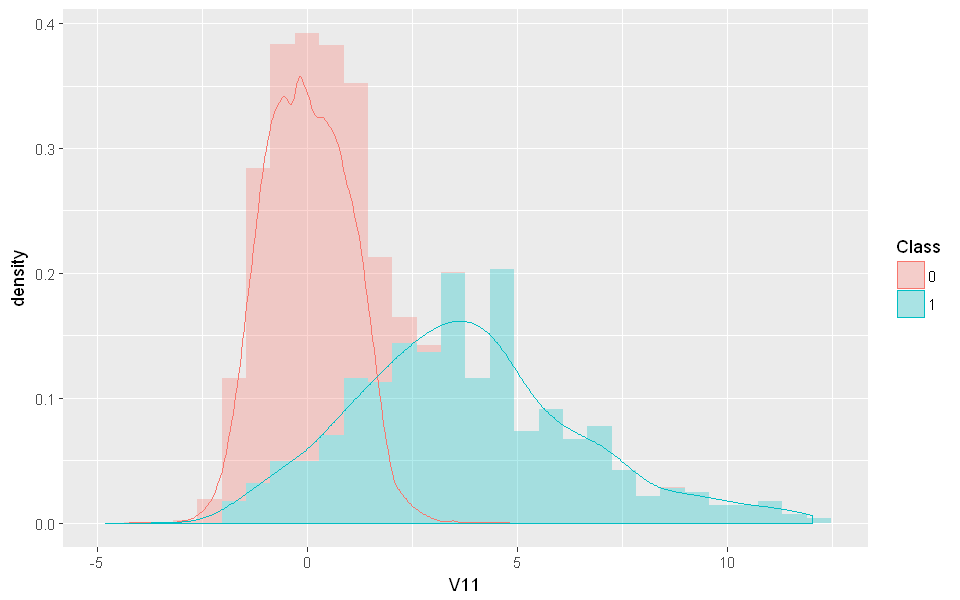

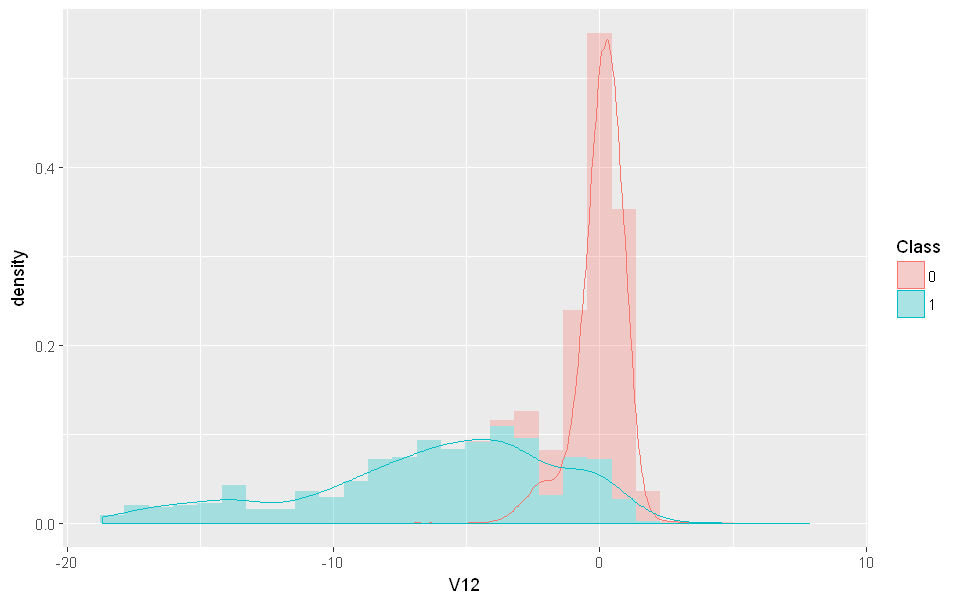

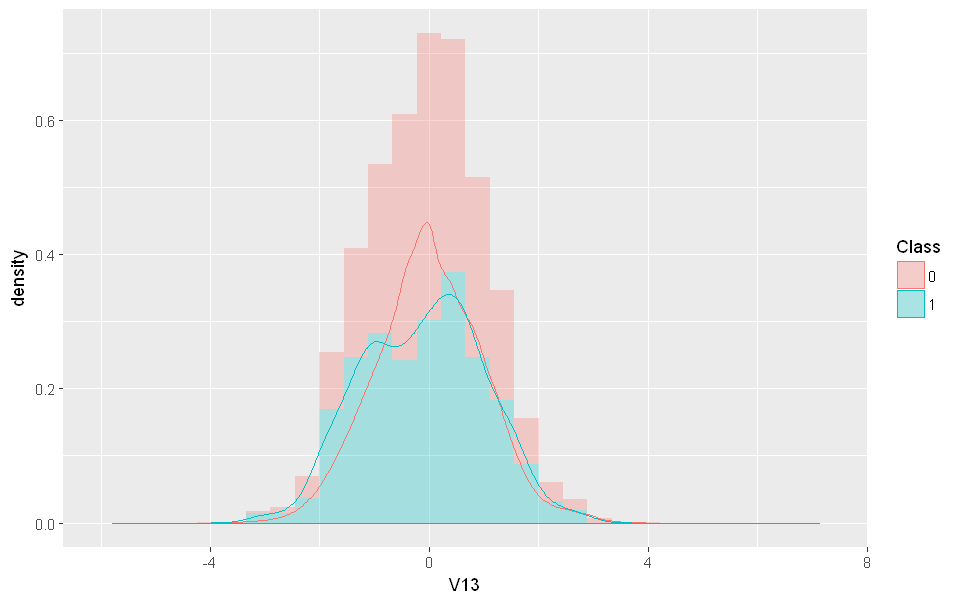

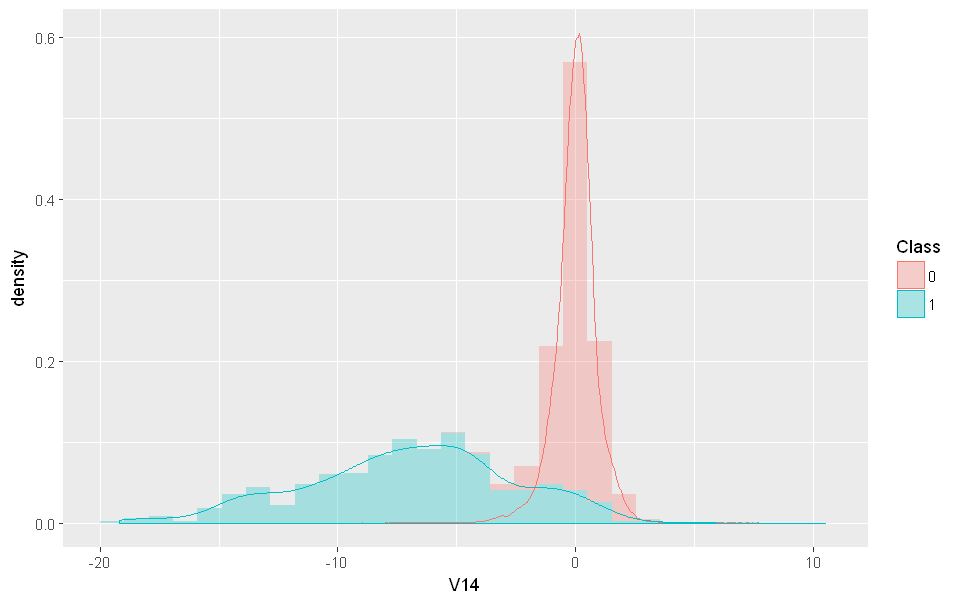

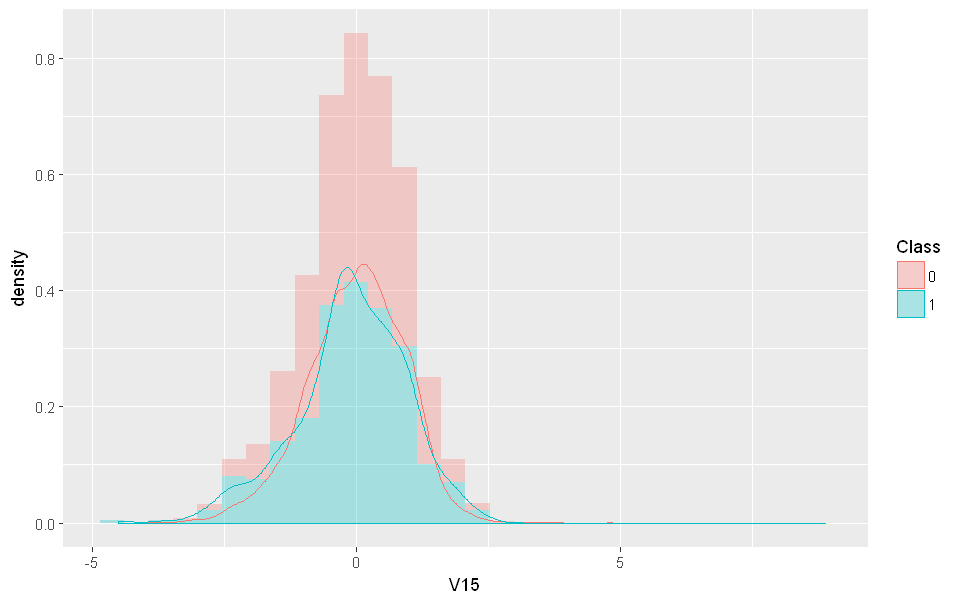

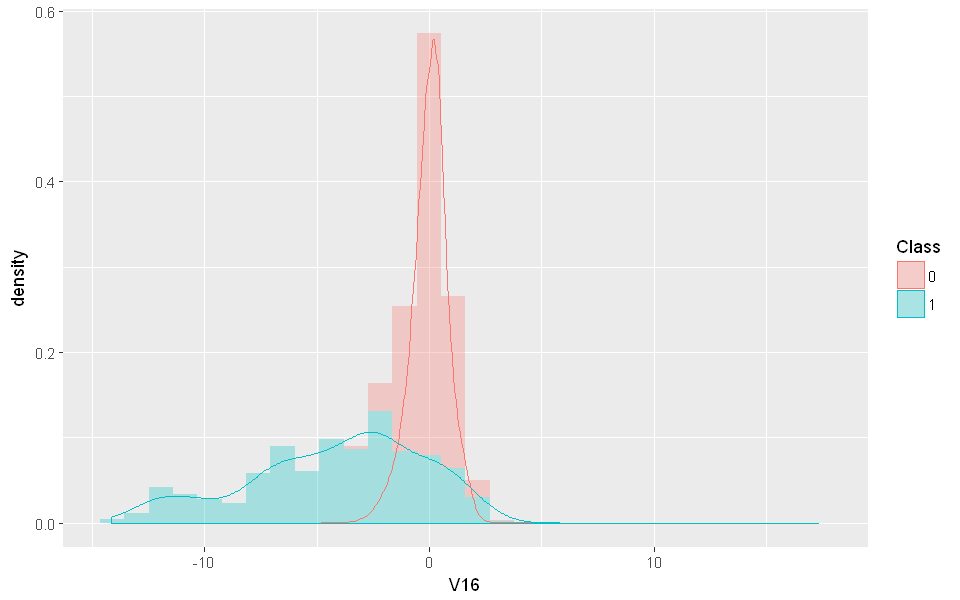

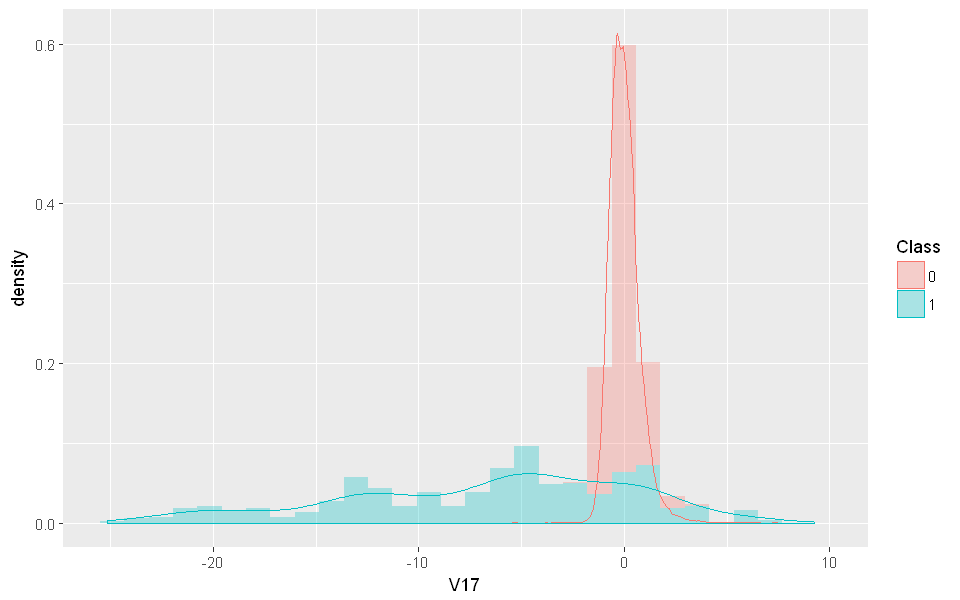

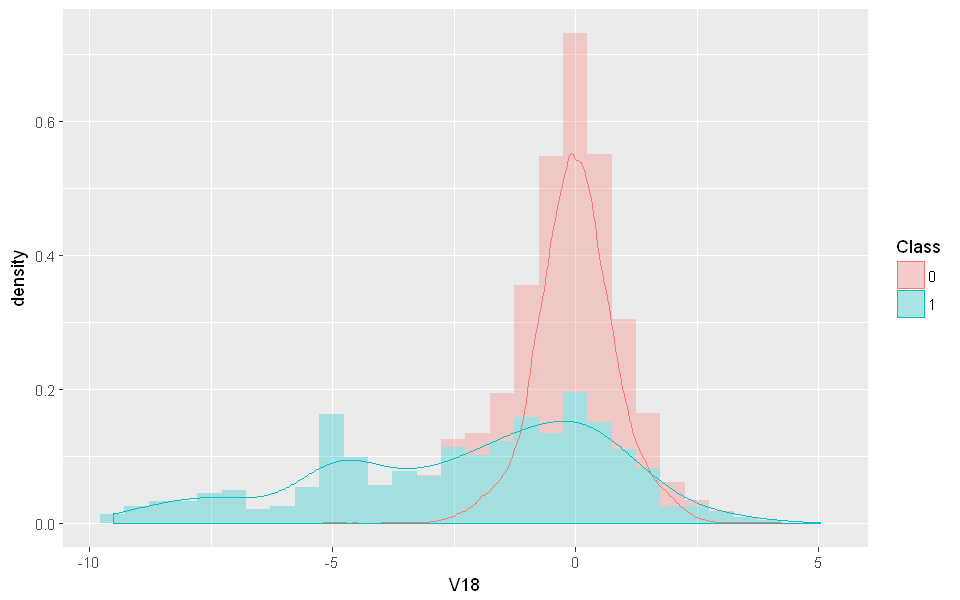

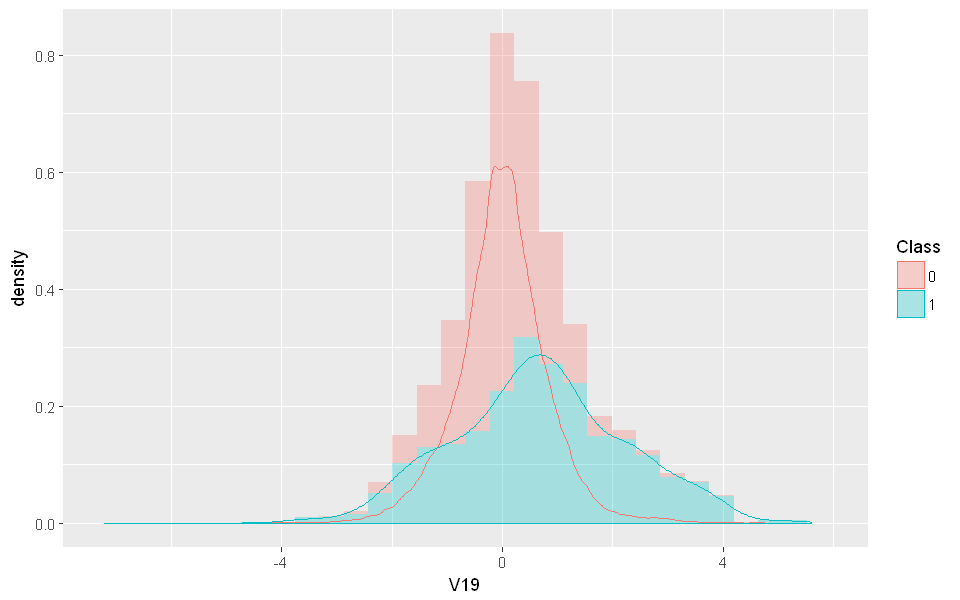

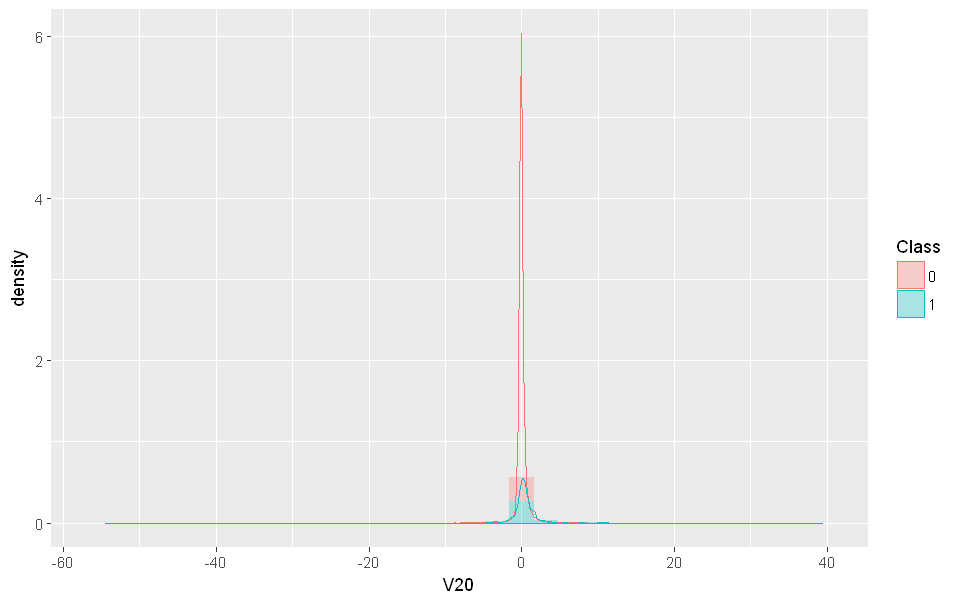

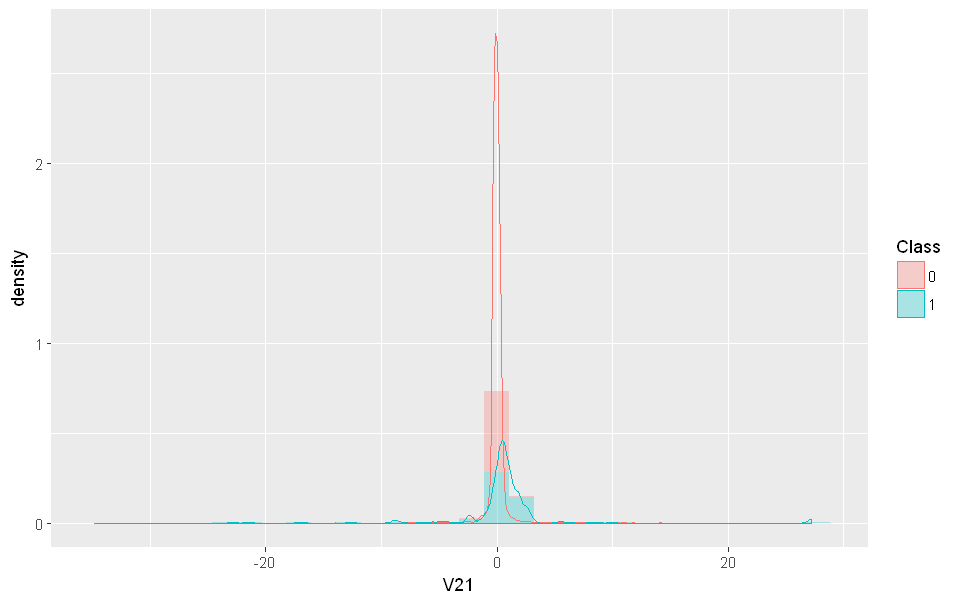

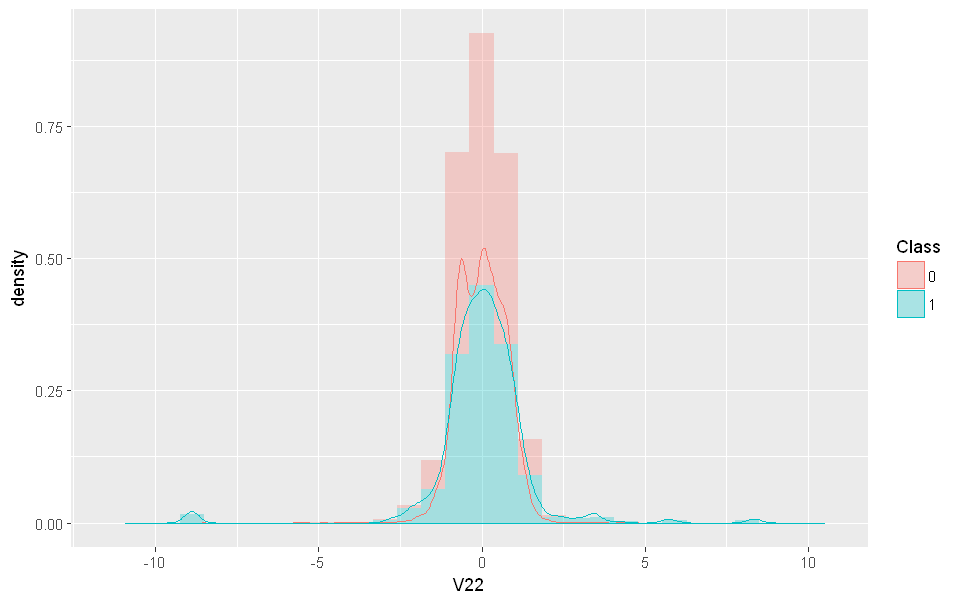

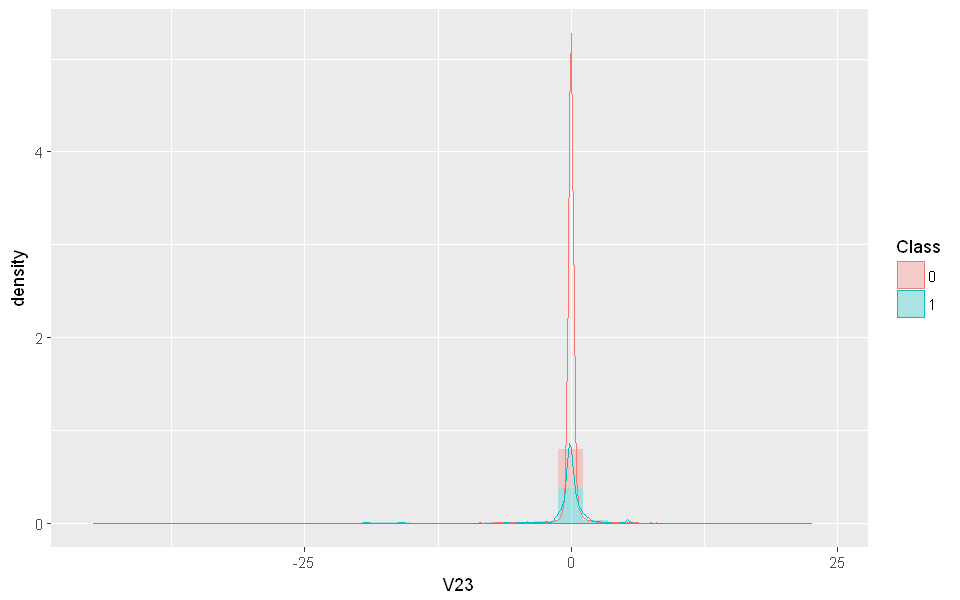

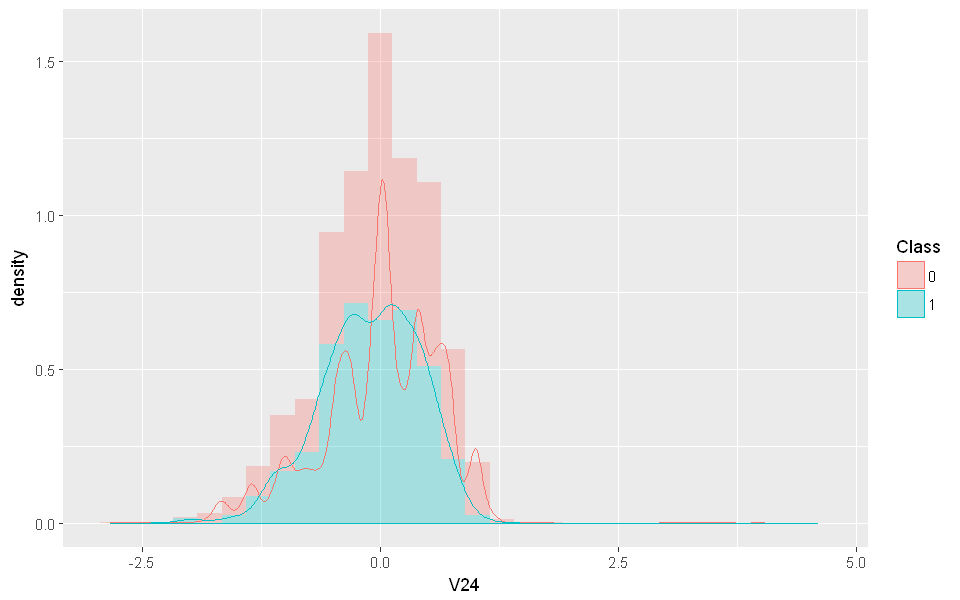

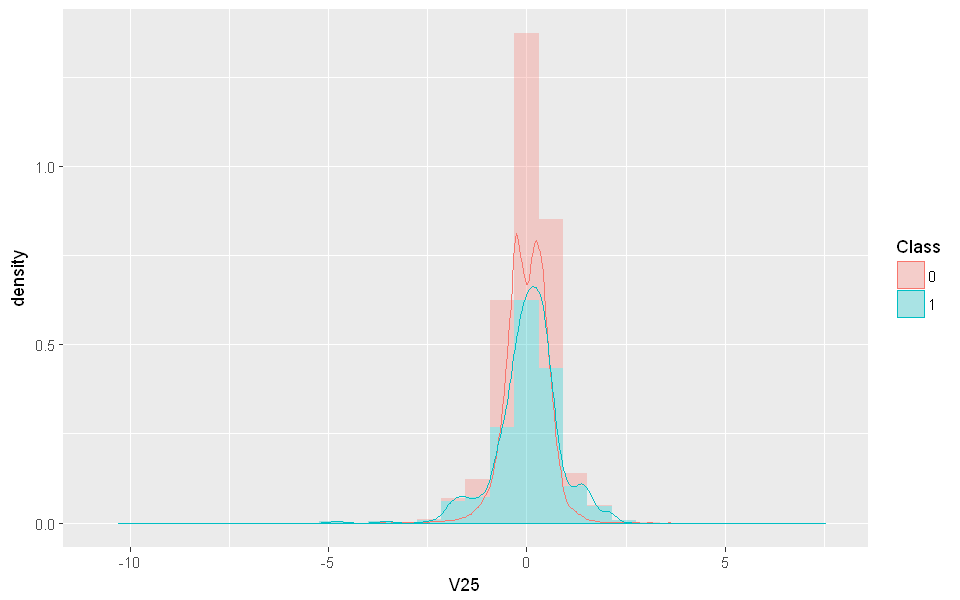

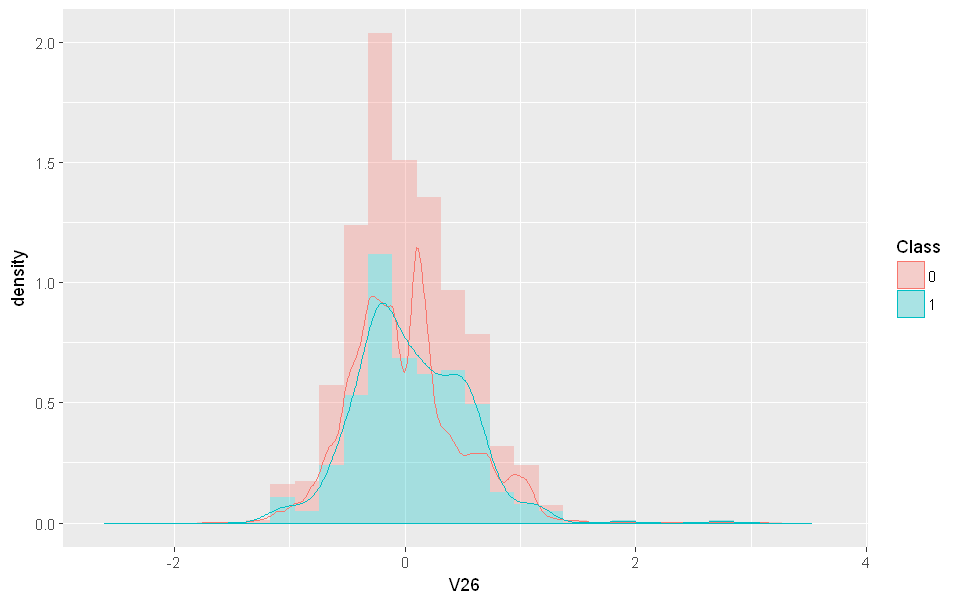

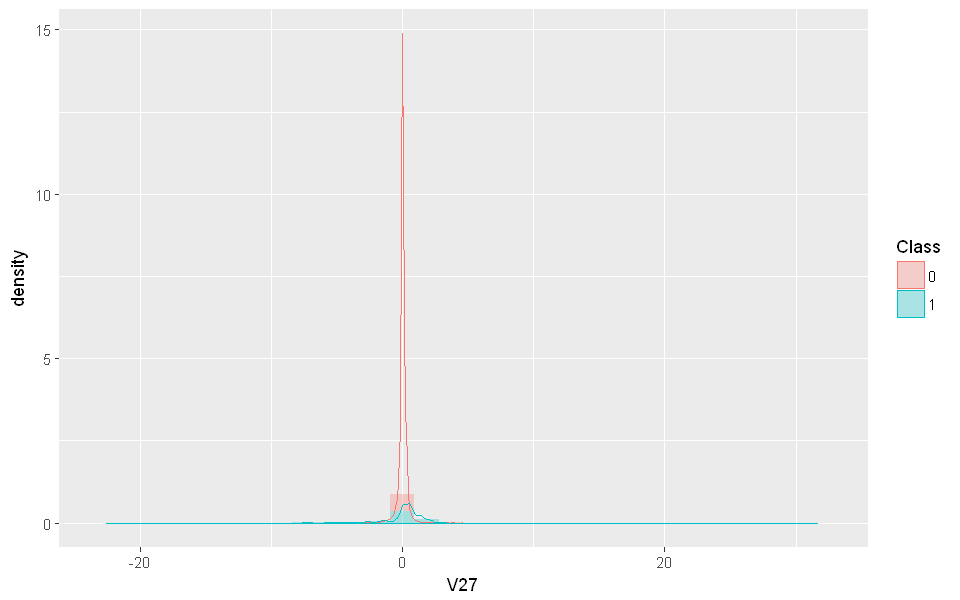

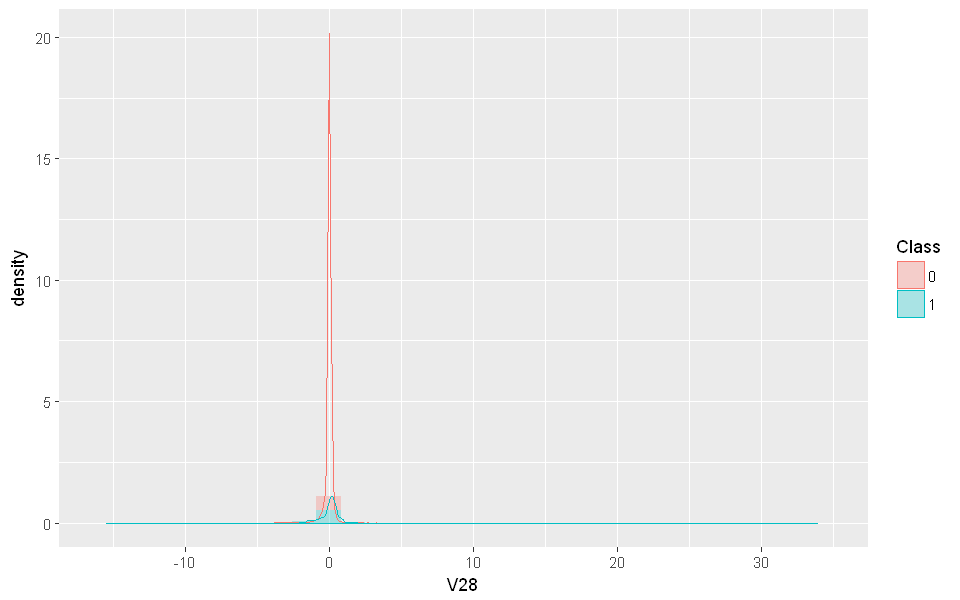

ERROR: Error: StatBin requires a continuous x variable the x variable is discrete. Perhaps you want stat="count"?


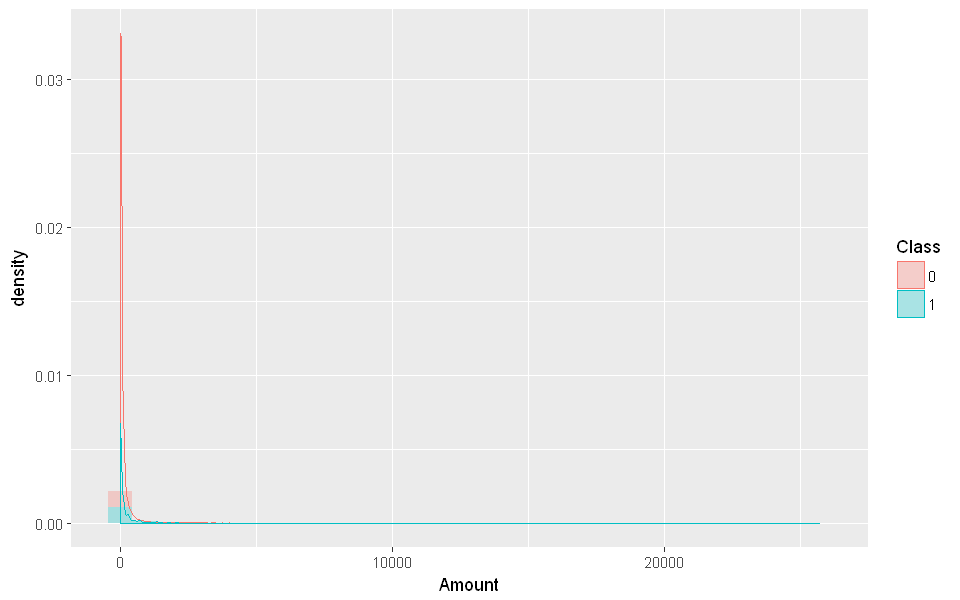

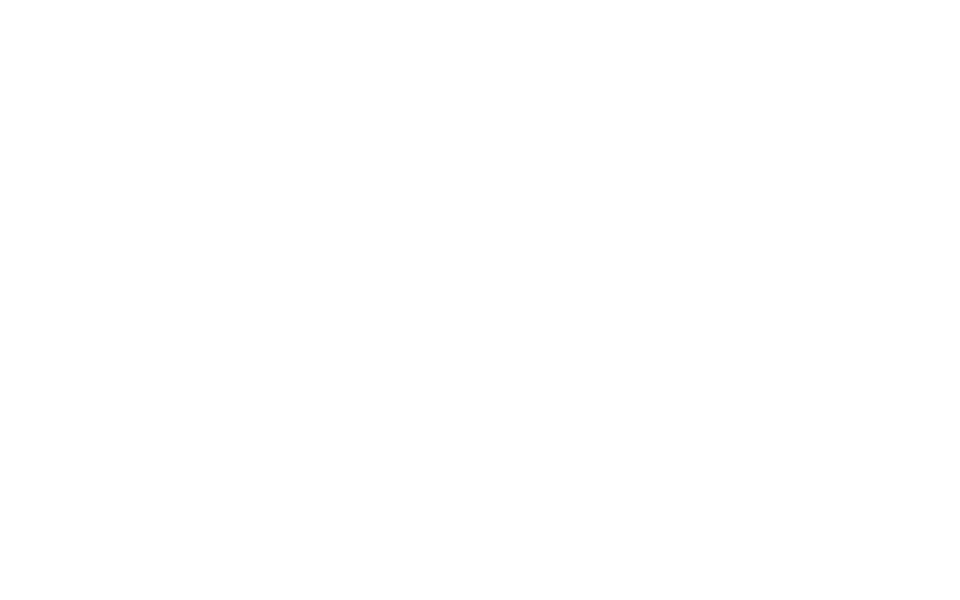

In [63]:
#p <- ggplot(df, aes_string)

for(col in names(df)) {
    p <- ggplot(df, aes_string(col))
    print(p + 
            geom_histogram(aes(y = ..density.., fill = Class), bins = 30, alpha = 0.3) + 
            geom_density(aes(color = Class), alpha = 0))
}

In [36]:
col

[1] "Class"

In [4]:
df <- df %>% 
  data.frame() %>% 
  mutate(Class = as.factor(Class))

Let us visually check how our dependent variable is ditributed:

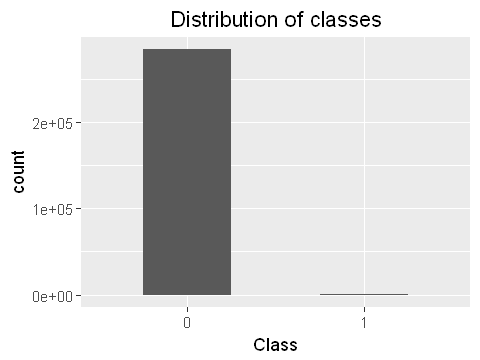

In [18]:
options(repr.plot.width=4, repr.plot.height=3)

ggplot(df) + 
  geom_bar(aes(x = Class), width = 0.5) + 
  ggtitle("Distribution of classes") + 
  theme(plot.title = element_text(hjust = 0.5))

In [41]:
table(df$Class)
table(df$Class)/nrow(df)


     0      1 
284315    492 


          0           1 
0.998272514 0.001727486 

Let us see how the transaction amounts vary between fraudulent and non-fraudulent transactions:

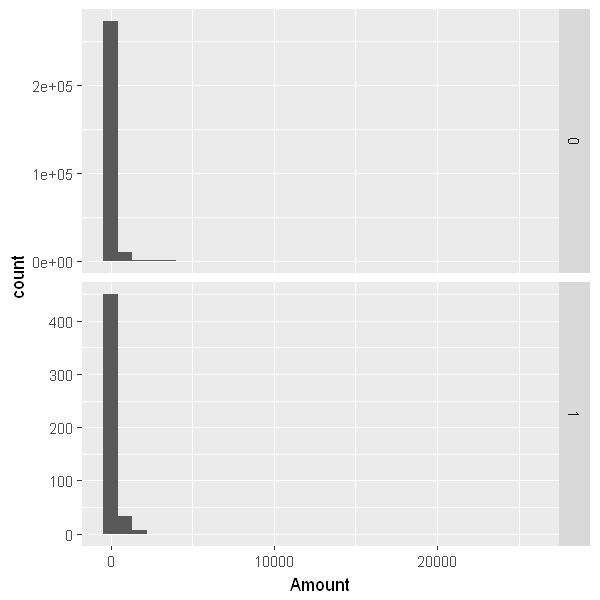

In [48]:
options(repr.plot.width = 5, repr.plot.height=5)

ggplot(df) + 
  geom_histogram(aes(Amount), bins = 30) + 
  facet_grid(Class ~ ., scales = "free")

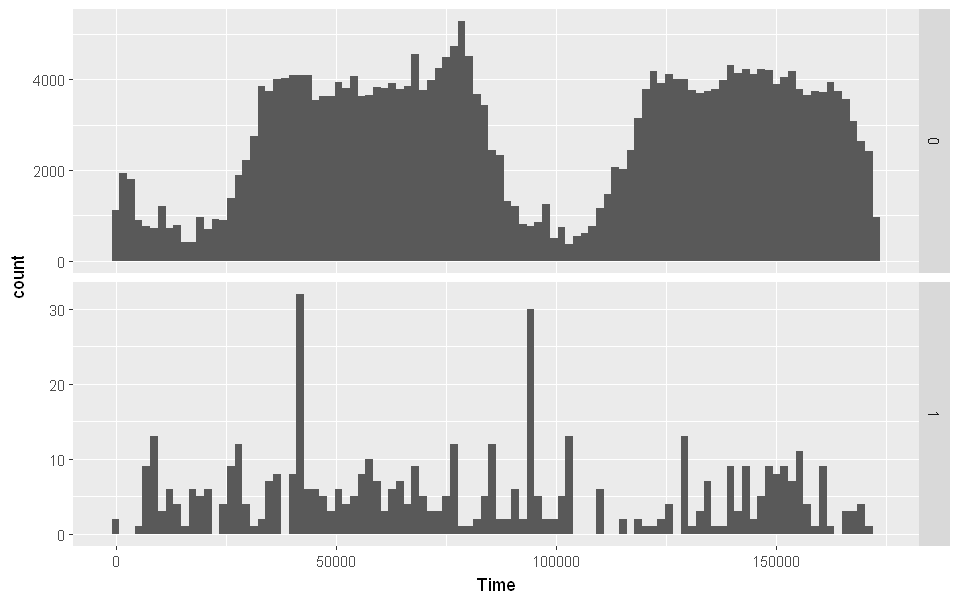

In [51]:
options(repr.plot.width = 8, repr.plot.height=5)

ggplot(df) + 
  geom_histogram(aes(Time), bins = 100) + 
  facet_grid(Class ~ ., scales = "free")

----------------------------------------------------------------------------------------------------------------------------
It is clear that the class is highly imbalanced. Therefore, it would be necessary to resample the dataset in such a way that the classes are balanced. There are a few ways to go about this. One option is doing undersampling (remove instances from the majority class to make the dataset balanced) or oversampling (replicate instances from the minority class to make the dataset balanced).

# Split data into training and testing

Let us begin by splitting our dataset into test and train. We use the `mlr` and `caret` packages in R for this exercise.

In [ ]:
#Set seed for random sampling
